In [ ]:
统计的假设检验是检验一个值是否等于另外一个值。

一个来源于数据（统计量），一个来源于假设

In [ ]:
总体和样本
做预测不会拿到总体数据

In [ ]:
样本统计量：随机变量
总体：存在但不知道

用样本估计总体：
    点估计（一个点估计）：公式
    区间估计（根据样本均值估计出区间）：置信区间（区间估计）总体均值在置信区间内

In [ ]:
以样本均值为中心，往外扩二倍的均值的标准差：置信区间
    均值的标准差（标准误）：房价本身的增长率，计算房价增长率的均值（每一次抽150个小区计算一个均值，抽n次，得到n个均值，拿均值做直方图）
    
    
均值的标准误=总体的标准差/根号n（抽的样本量）
样本量越大，均值的标准误越小


所以知道样本的均值，在知道样本的均值标准误==得到置信区间

几倍的标准误主要看置信区间需要多大

In [1]:
import os
os.chdir(r'E:\Ajiao\LiXian\资料\技术实详解与商业实战\280_Ben_八大直播八大案例配套课件\第四章\提交-第四讲：统计建模与分析报告-二手房价格分析报告\脚本\6inference')

import pandas as pd

In [2]:
house_price_gr=pd.read_csv(r'house_price_gr.csv',encoding='gbk')
house_price_gr
# 房屋 + 9月份的同比增长率

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484
2,东城区胡家园小区,0.141358
3,东城区台基厂小区,0.063197
4,东城区青年湖小区,0.101528
...,...,...
145,密云县沿湖小区,0.121524
146,密云县东菜园小区,0.104666
147,密云县花园小区,0.137225
148,开发区鹿鸣苑,0.073119


In [ ]:
首先汇报根据样本得到的均值===》置信区间
得到样本的均值是11%，不一定总体均值是11%
绘图进行描述性统计，看描述情况

找置信区间
    计算标准误
    设定下限：数据均值 - 2*标准误
    设定上限：数据均值 + 2*标准误
    得到95%的置信区间
#抽取了150个小区的房价增长率，得到增长率均值为11%，95%的置信区间是(0.10337882853175007, 0.11674316487209624)
# 所以样本均值(北京市房价同比增长率)<10.3%的概率不超过2.5%[（1-95%）/2]

上述未作假设检验，只是进行区间估计，而且是基于正态分布的图像（或者看pb图）
(pb图如果点和线是几乎完全重合，那么是正态分布),注意是看数据是否是正态分布，不用看均值是否为正态分布，如果数据为正态分布，则均值也一定是是

中心极限定理如果数据不是正态分布，数据是独立同分布且样本量足够大（>30个样本）的时候，均值服从正太分布

In [6]:
#描述性统计
house_price_gr.describe(include='all')

,dis_name,rate
count,150,150.000000
unique,150,NaN
top,顺义区西辛小区,NaN
freq,1,NaN
mean,NaN,0.110061
std,NaN,0.041333
min,NaN,0.029540
25%,NaN,0.080027
50%,NaN,0.104908
75%,NaN,0.140066


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

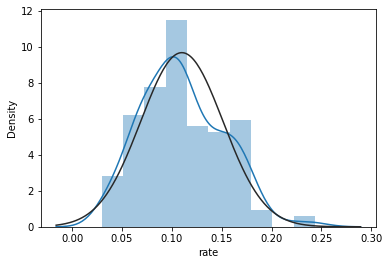

In [7]:
get_ipython().magic('matplotlib inline')
import seaborn as sns
from scipy import stats

sns.distplot(house_price_gr.rate, kde=True, fit=stats.norm) # Histograph

In [8]:
# 置信区间
se = house_price_gr.rate.std() / len(house_price_gr) ** 0.5  #计算标准误
LB = house_price_gr.rate.mean() - 1.98 * se#上届，百分之95对应的是1.98倍的标准差
UB = house_price_gr.rate.mean() + 1.98 * se#下界
(LB, UB)
#抽取了150个小区的房价增长率，得到增长率均值为11%，95%的置信区间是(0.10337882853175007, 0.11674316487209624)
# 样本均值(北京市房价同比增长率)<10.3%的概率不超过2.5%

(0.10337882853175007, 0.11674316487209624)

In [ ]:
以上都是正态分布得出的结果

In [ ]:
如果分布是正态分布的，均值也一定是正态分布

In [ ]:
中心极限定理：
    抽样的数据量足够大（>30个样本），且数据独立同分布的情况下，其均值是服从正态分布的
    